In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from keras.datasets import mnist

In [3]:
hand_written = mnist.load_data()
(X_train_3d, y_train), (X_test_3d, y_test) = mnist.load_data()

In [4]:
X_train_3d.shape

(60000, 28, 28)

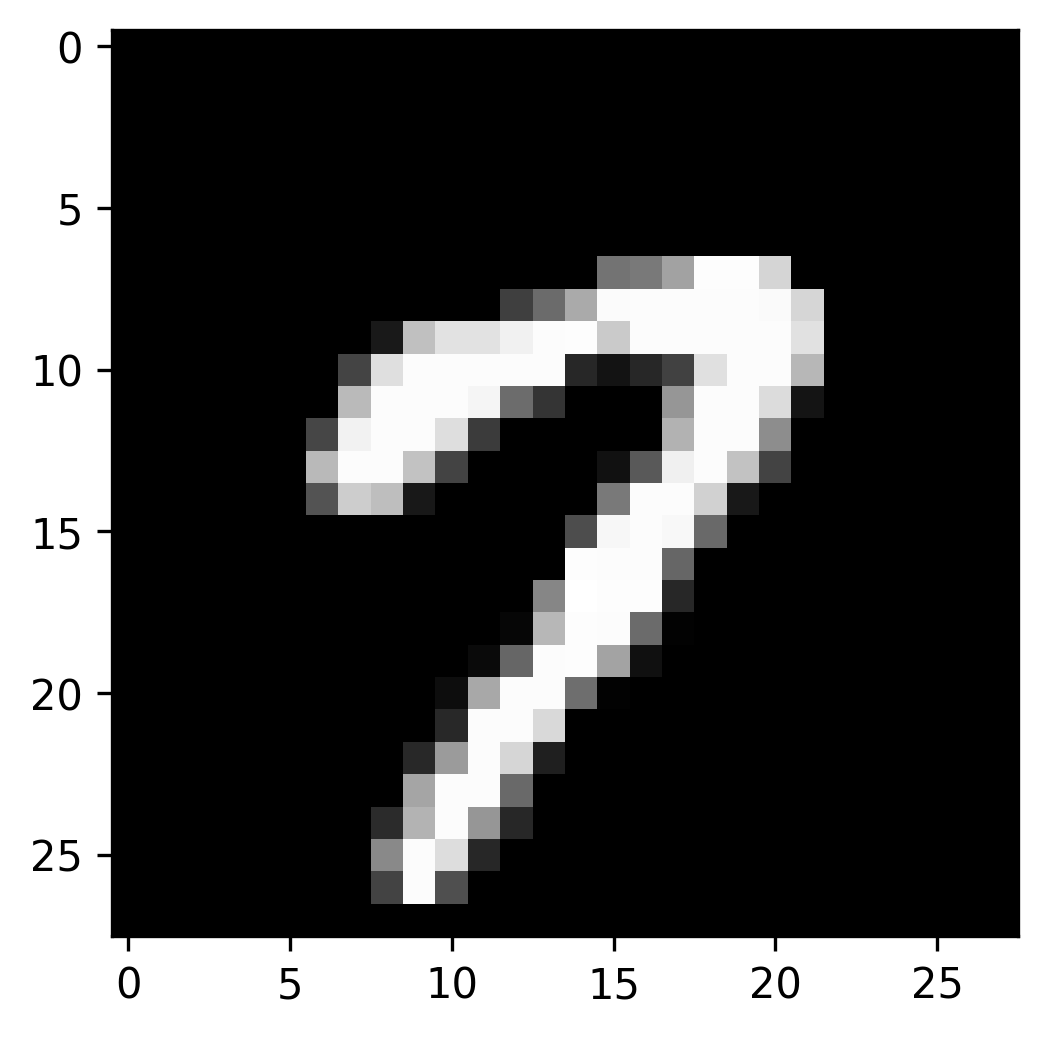

In [5]:
plt.figure(dpi=300)
plt.imshow(X_train_3d[15], cmap='gray')
plt.show()

In [6]:
x = np.array([[1, 2], [3, 4]])
x

array([[1, 2],
       [3, 4]])

In [7]:
X_train_2d = X_train_3d.reshape(60000, 784)

X_test_2d = X_test_3d.reshape(10000, 784)

In [8]:
np.vstack([X_train_3d[0].flatten(), X_train_3d[1].flatten()])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
X_train_2d.shape

(60000, 784)

In [10]:
steps = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]

In [11]:
pipeline = Pipeline(steps)

parameter = {'knn__n_neighbors':np.arange(1, 15)}

cv = GridSearchCV(pipeline, parameter, cv=5)

cv.fit(X_train_2d, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [21]:
joblib.dump(cv, 'hand_written_classifier.joblib')

['hand_written_classifier.joblib']

In [12]:
cv.score(X_test_2d, y_test)

0.9452

In [13]:
y_pred = cv.predict(X_test_2d)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.95      0.99      0.97      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.93      0.93      0.93       892
           6       0.97      0.97      0.97       958
           7       0.94      0.93      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000



In [15]:
cv.best_params_

{'knn__n_neighbors': 3}

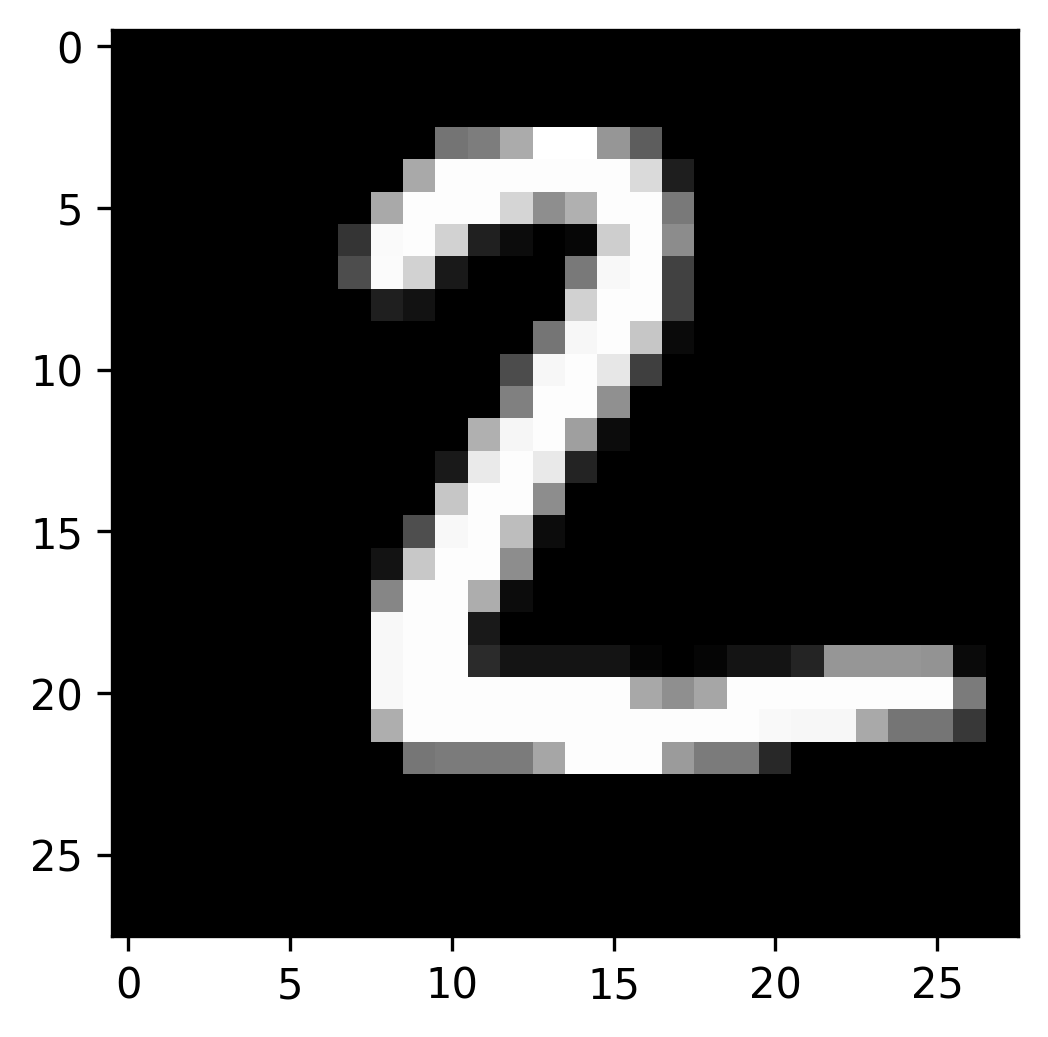

In [16]:
plt.figure(dpi=300)
plt.imshow(X_test_3d[1], cmap='gray')
plt.show()

In [17]:
X_test_2d.shape

(10000, 784)

In [18]:
cv.predict(X_test_2d[1:3])

array([2, 1], dtype=uint8)

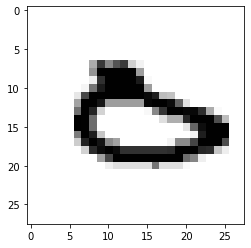

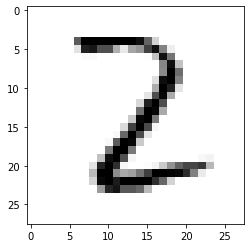

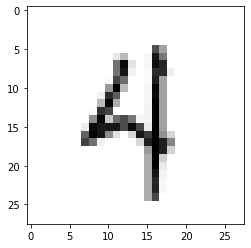

The numbers are:
  - 6
  - 2
  - 4


In [19]:
no_preds = 3

rand_inds = [int(np.random.random() * 1798) for i in range(no_preds)]


for i in rand_inds:
    img = X_test_3d[i]
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

z = X_test_2d[rand_inds[0]]
rand_inds.pop(0)

for i in rand_inds:
    z = np.vstack([z, X_test_2d[i]])

predictions = cv.predict(z)

print('The numbers are:')

for prediction in predictions:
    print('  -', prediction)
